In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
data = pd.read_csv("assets/spotify_songs.csv")
data["duration_m"] = (data["duration_ms"] / 100000).round()
data["year"] = data["track_album_release_date"].str.split("-", expand=True)[0]
data["month"] = data["track_album_release_date"].str.split("-", expand=True)[1]
data["day"] = data["track_album_release_date"].str.split("-", expand=True)[2]

data["month"] = data["month"].fillna("-1")
data["day"] = data["day"].fillna("-1")

data["year"] = data["year"].astype(int)
data["month"] = data["month"].astype(int)
data["day"] = data["day"].astype(int)

data["year_round"] = (data["year"].astype(int) / 10).round()

data["round_tempo"] = data["tempo"].round()

data.sample(100)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,liveness,valence,tempo,duration_ms,duration_m,year,month,day,year_round,round_tempo
25345,53BX9bScZinfUywOiZdm7z,In Between,dvsn,56,2QF9IT7irnk83GLHbl2hDN,In Between,2019-07-09,Neo-Soul,1eqVgsNjaX6mxDPoefhocT,r&b,...,0.0981,0.507,84.624,201546,2.0,2019,7,9,202.0,85.0
4035,3feET0c3SdUNzA7rJUehb4,Sacrifice,Boy Untitled,5,4uTMXIn8Tt2L4l5yApUfcd,Sacrifice,2018-08-17,POPTIMISM,6lWMi4lPiiPwDqn8ZpeyAY,pop,...,0.1470,0.356,127.675,183000,2.0,2018,8,17,202.0,128.0
14635,4SRtBFocTtcaWP3etJb7GK,Robbery,Lime Cordiale,64,44z3Y440N9zArT55GONVBe,Robbery,2019-09-20,Modern Indie Rock // Alternative Rock / Garage...,1VnvyBDqoV5TCZAnXYferL,rock,...,0.2130,0.890,152.937,223234,2.0,2019,9,20,202.0,153.0
6225,4SWWe2OYC4mqf40Gc2RSdl,Down Below,Roddy Ricch,78,1jlIU9p7PChTK3AeqNpnsX,Feed Tha Streets II,2018-11-02,Hip-Hop Favourites,37i9dQZF1DX48TTZL62Yht,rap,...,0.0896,0.340,119.969,224002,2.0,2018,11,2,202.0,120.0
7881,2z1FmK5To9gj1rU4mS20f9,Freaks of the Industry,Digital Underground,42,1qUuOtsaAWlD6D83AebzD0,Sex Packets,1990-03-26,Minitruckin Playlist,0VVH2Nzj6kBVGK3WIUQMAw,rap,...,0.1160,0.385,88.543,340907,3.0,1990,3,26,199.0,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17472,5HzbxweVAtisCrpoOF11qt,Millionaire - Alan Walker Remix,Digital Farm Animals,60,05XuMZb14sDGgreCf3Wu6F,Millionaire (Alan Walker Remix),2016-09-02,Tropical House Run 190 BPM,37i9dQZF1DWSTc9FdySHtz,latin,...,0.1480,0.424,96.044,189347,2.0,2016,9,2,202.0,96.0
10897,2iJZw6ten3NcgjJmX5ZoxO,Felix Felices,N.A,28,2Pe6xxZWuOceA2Oe2VMwKa,Pensamentos de uma Mente Pouco Usada,2019-10-16,Dose Trap,37i9dQZF1DWWlW7KLhEhCZ,rap,...,0.4110,0.606,139.963,169714,2.0,2019,10,16,202.0,140.0
24480,6xGAe69Vn07PnQQPQI083T,A Song For Mama,Boyz II Men,31,1aVyRcDS6m2qIyiSgCj4ge,The Best Of Boyz II Men 20th Century Masters T...,2003-10-07,90s R&B - The BET Planet Groove/Midnight Love Mix,7LjRWGUdOmBdPG1W1bga4i,r&b,...,0.1180,0.150,75.016,301587,3.0,2003,10,7,200.0,75.0
29154,2JPRzi73qRt1kYSSwQHQUJ,Keep On Loving,Topic,51,5ODwXvnCJLwIMqs4iqYIG7,Keep On Loving,2019-09-20,Trance Party 2019 by FUTURE TRANCE,2yofeyPwe0ZNmJHTrGz2Qt,edm,...,0.0700,0.328,127.959,195000,2.0,2019,9,20,202.0,128.0


<Axes: xlabel='track_popularity', ylabel='Count'>

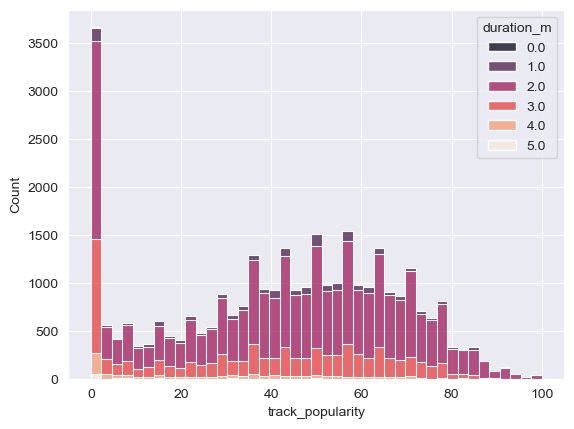

In [15]:
sns.histplot(data=data, x="track_popularity", hue="duration_m", multiple="stack",
             palette="rocket")

<Axes: xlabel='track_popularity', ylabel='Count'>

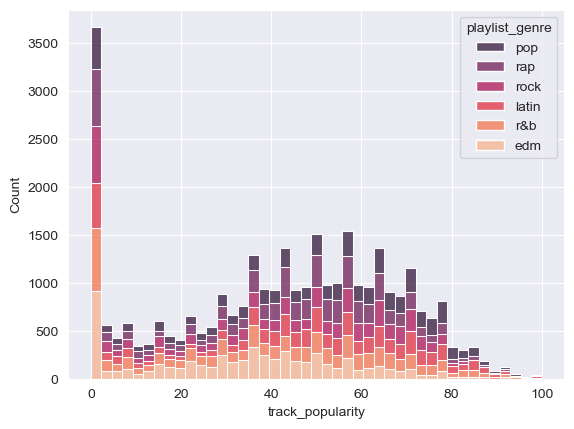

In [57]:
sns.histplot(data=data, x="track_popularity", hue="playlist_genre", multiple="stack",
             palette="rocket")

<Axes: xlabel='month', ylabel='Count'>

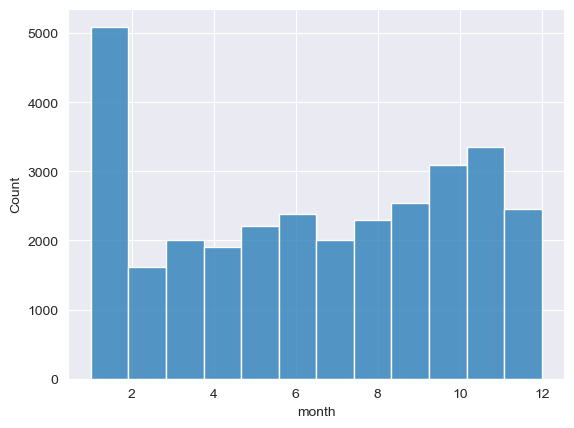

In [84]:
sns.histplot(data=data[data["month"] >= 0], x="month", bins=12)

<Axes: xlabel='playlist_genre', ylabel='Count'>

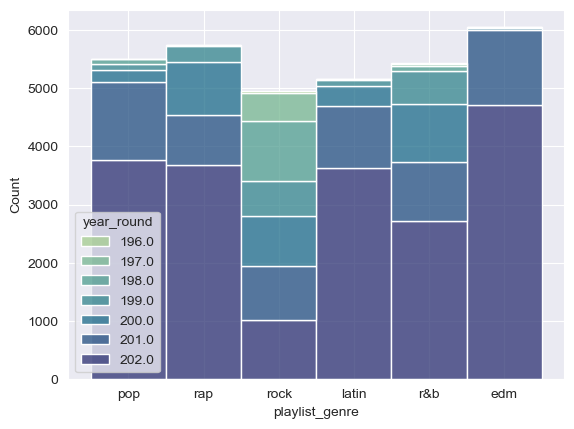

In [76]:
sns.histplot(data=data, x="playlist_genre", hue="year_round", multiple="stack", palette="crest")

<Axes: xlabel='round_tempo', ylabel='Count'>

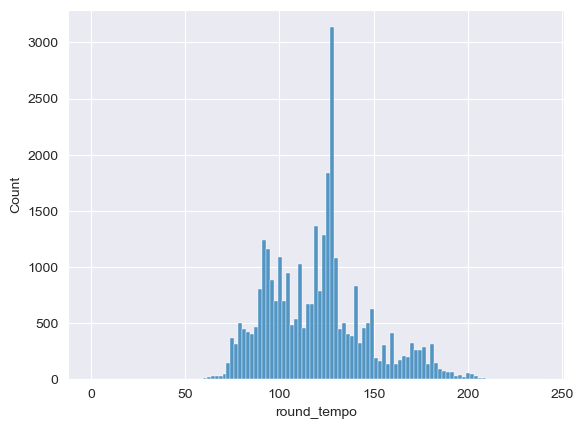

In [51]:
sns.histplot(data=data, x="round_tempo")

<Axes: xlabel='duration_ms', ylabel='Count'>

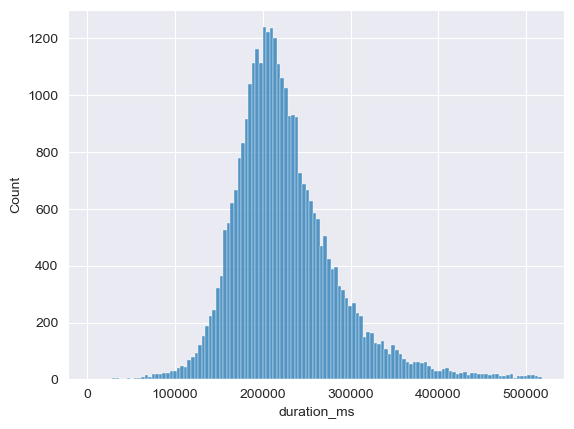

In [87]:
sns.histplot(data=data, x="duration_ms")

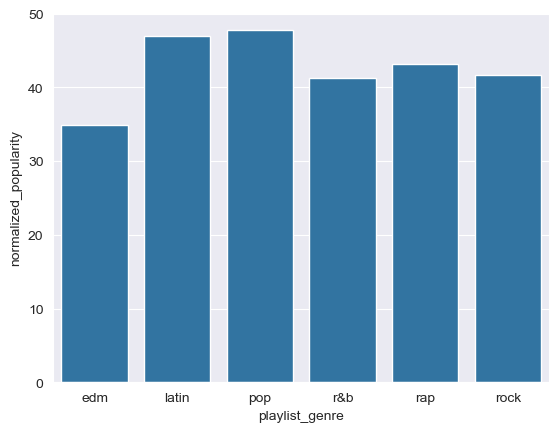

In [123]:
grouped_data = data.groupby('playlist_genre')['track_popularity'].agg(['sum', 'count']).reset_index()

# Calculate normalized popularity
grouped_data['normalized_popularity'] = grouped_data['sum'] / grouped_data['count']

# Plot the bar chart
sns.barplot(data=grouped_data, x="playlist_genre", y="normalized_popularity")

<Axes: xlabel='playlist_genre', ylabel='Count'>

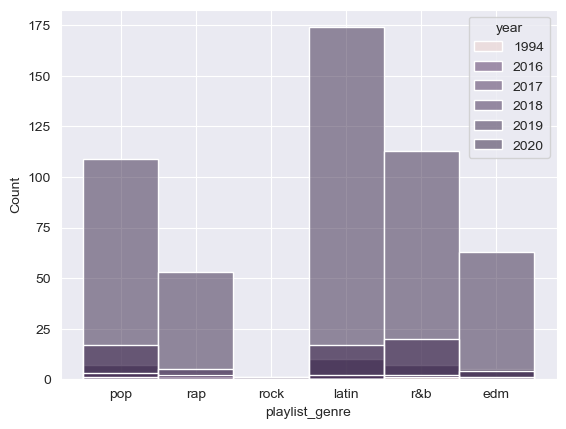

In [139]:
sns.histplot(data=data[data["track_popularity"] > 85], x="playlist_genre", hue="year")

<Axes: xlabel='playlist_subgenre', ylabel='Count'>

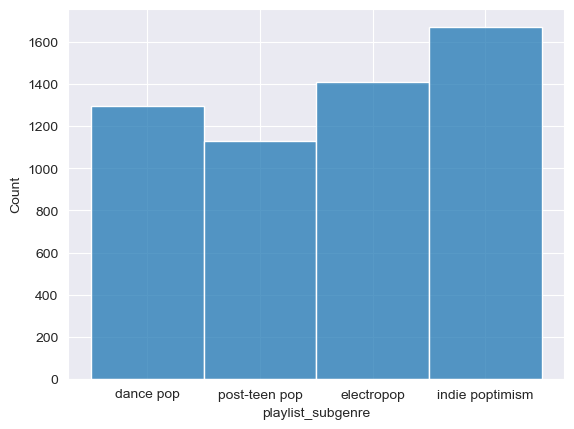

In [64]:
sns.histplot(data=data[data["playlist_genre"] == "pop"], x="playlist_subgenre")

<Axes: xlabel='playlist_subgenre', ylabel='Count'>

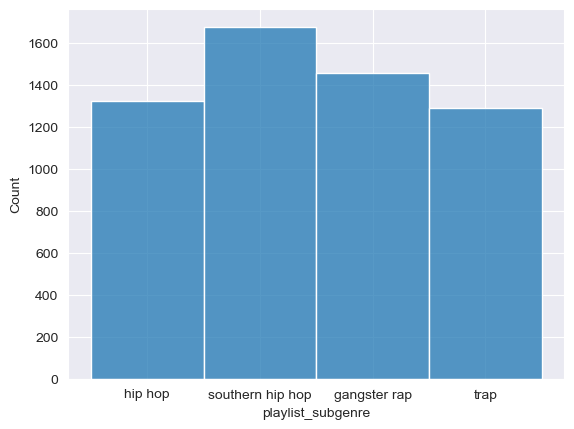

In [65]:
sns.histplot(data=data[data["playlist_genre"] == "rap"], x="playlist_subgenre")

<Axes: xlabel='playlist_subgenre', ylabel='Count'>

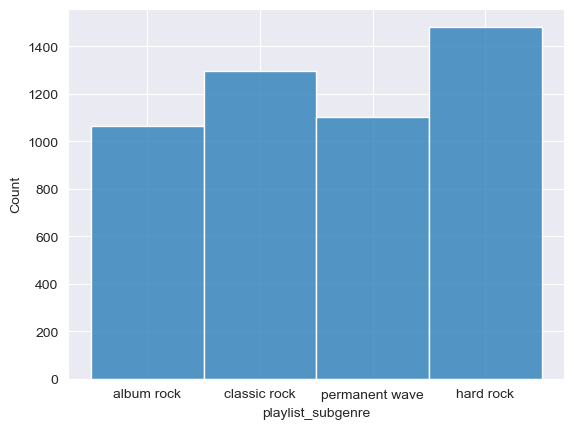

In [103]:
sns.histplot(data=data[data["playlist_genre"] == "rock"], x="playlist_subgenre")

<Axes: xlabel='year', ylabel='Count'>

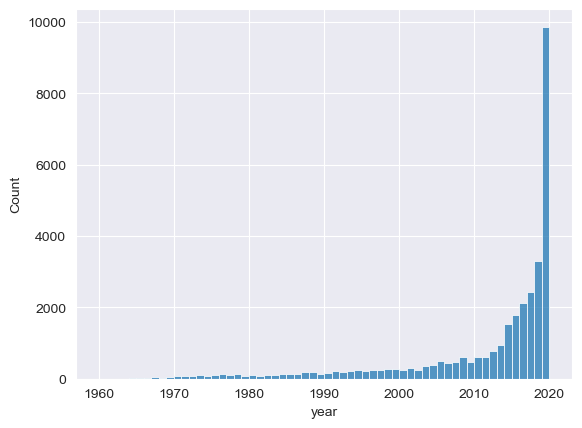

In [115]:
sns.histplot(data=data, x="year", binrange=(1960,2020),bins=2020-1960)

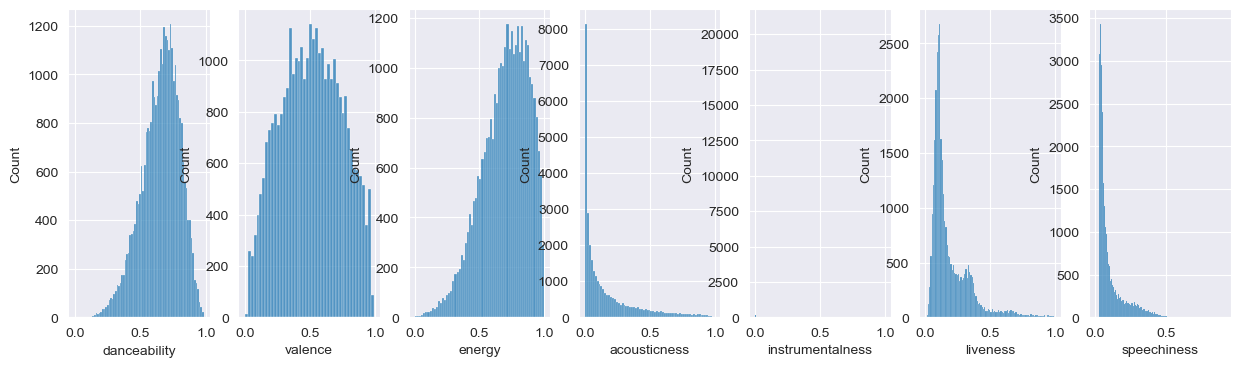

In [114]:
variables = ["danceability", "valence", "energy", "acousticness", "instrumentalness", "liveness", "speechiness"]

# Set up a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=len(variables), figsize=(15, 4))

for i, variable in enumerate(variables):
    sns.histplot(data=data, x=variable, ax=axes[i])


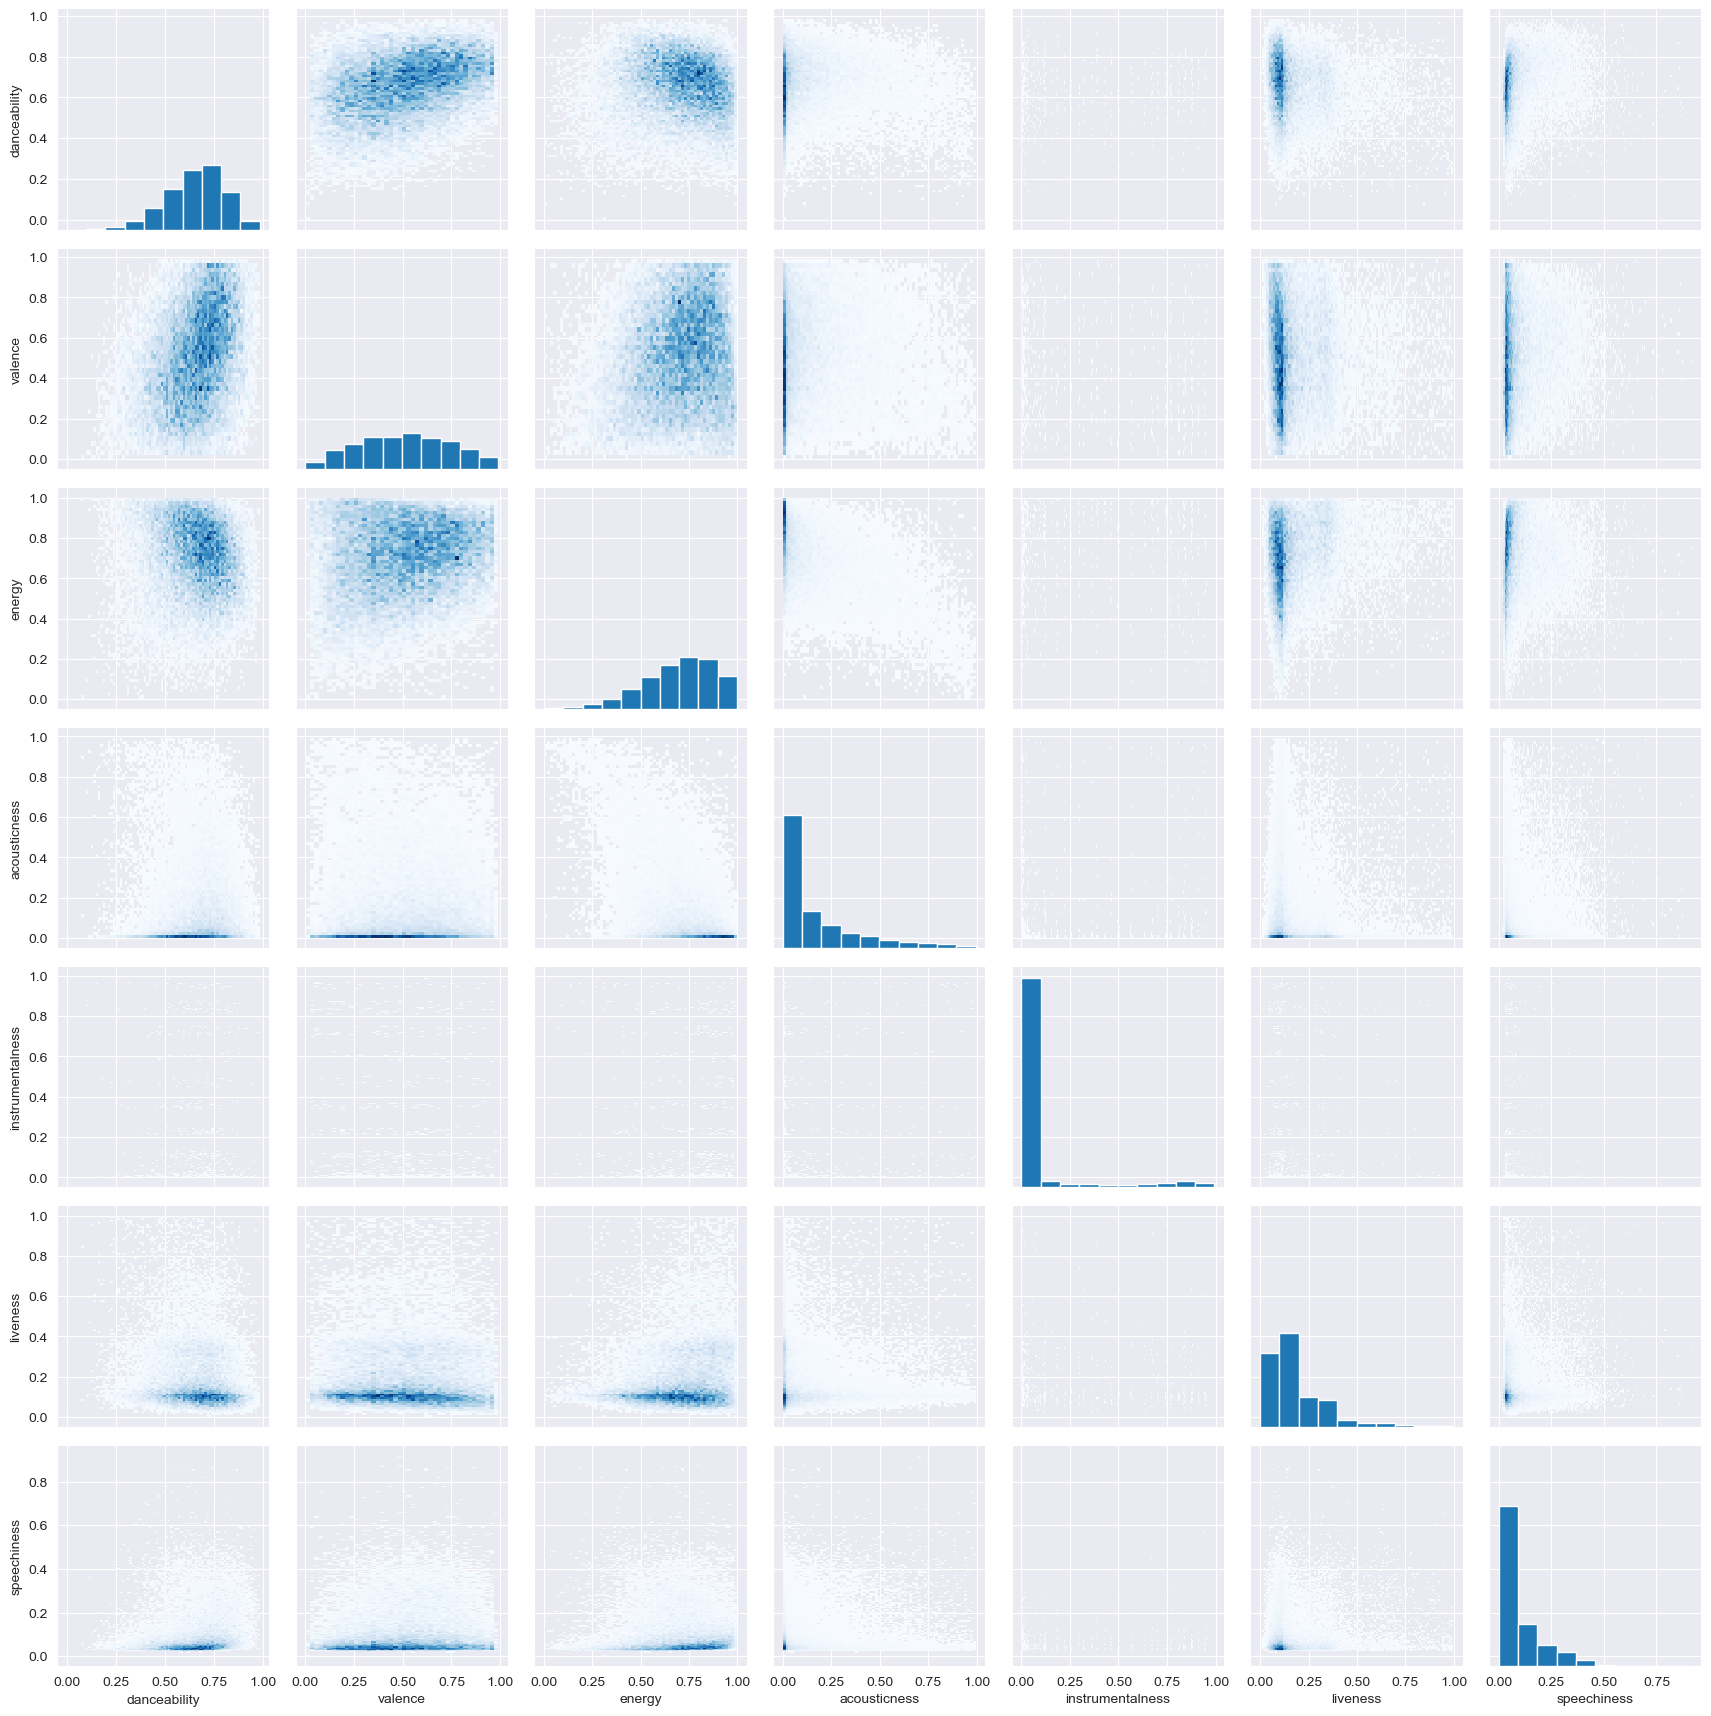

In [117]:
variables = ["danceability", "valence", "energy", "acousticness", "instrumentalness", "liveness", "speechiness"]

# Create a PairGrid with histplots
grid = sns.PairGrid(data, vars=variables)
grid.map_diag(plt.hist)
grid.map_offdiag(sns.histplot, cmap='Blues')  # Use cmap to specify the color map

plt.show()